In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import randrange
from adjustText import adjust_text

In [2]:
df = pd.read_csv("Dunbar's number.csv")
df

,S/N,Masked Name,Gender,Proximity
0,1,"YY, Tan",F,1.0
1,11,"B, Chua",M,1.0
2,3,"HX, Ang",F,1.5
3,62,"HX, Yeo",F,1.5
4,4,"W, Ang",M,2.0
...,...,...,...,...
139,70,"A, Chee",F,9.0
140,112,"D, Hsu",F,9.0
141,122,"ZR, Lee",F,9.0
142,123,"YJ, Peh",F,9.0


In [3]:
# Augment coordinates to plot
df = df.drop(labels=['S/N'], axis=1)
df['Rand'] = df.apply(lambda x: randrange(360), axis=1)
df['X'] = df.apply(lambda x: x.Proximity * math.sin(math.radians(x.Rand)), axis=1)
df['Y'] = df.apply(lambda x: x.Proximity * math.cos(math.radians(x.Rand)), axis=1)

In [4]:
# Add self coordinate
base = {"Name": "Self", 
        "Masked Name": "Self", 
        "Gender": "X", "Proximity": 0, 
        "X": 0, 
        "Y": 0, 
        "Rand": 0}
df = df.append(base, ignore_index=True)

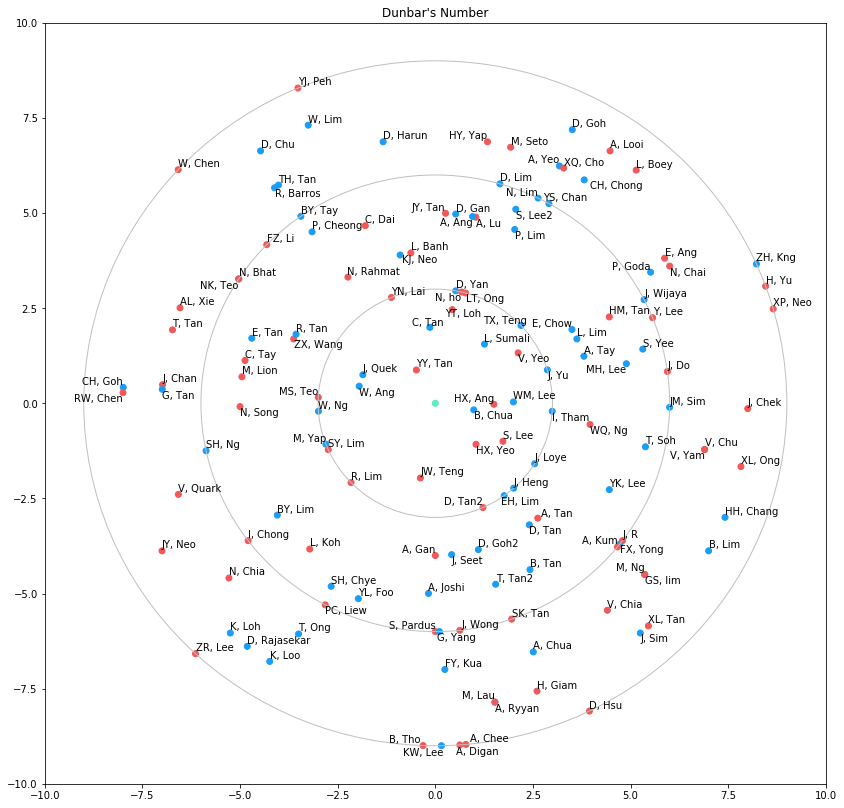

In [5]:
# Build base plot
colors = {"F": '#F25858', "M": '#1A9DF6', "X": '#5EECC0'}

plt.figure(figsize=[14,14])
plt.scatter(x=df['X'], y=df['Y'], c=df['Gender'].map(colors), label=df['Gender'])
plt.title("Dunbar's Number")

plt.ylim(-10,10)
plt.xlim(-10,10)

# Plot and adjust labels
texts = []

for index in range(len(df)-1):
    texts.append(plt.text(df['X'][index], df['Y'][index], df['Masked Name'][index]))
#     plt.text(df['X'][index], df['Y'][index], df['Masked Name'][index])
    
adjust_text(texts, only_move={'points':'y', 'texts':'y'})

# Draw circle boundaries
circle1 = plt.Circle((0, 0), 3, fill=False, edgecolor='#C0C0C0')
circle2 = plt.Circle((0, 0), 6, fill=False, edgecolor='#C0C0C0')
circle3 = plt.Circle((0, 0), 9, fill=False, edgecolor='#C0C0C0')

fig = plt.gcf()
ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

# Save plot
plt.savefig("Dunbar's Number.png")

# Show plot
plt.show()